<a href="https://www.kaggle.com/code/siddhantsoam/quora-same-question-pair?scriptVersionId=158359488" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/sample_submission.csv
/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv
/kaggle/input/dataset/nlp/sample_submission.csv
/kaggle/input/dataset/nlp/train.csv
/kaggle/input/dataset/nlp/test.csv
/kaggle/input/quora-processed-data/processed_data_wo_index.csv


In [2]:
# Audio notification after a cell execution is done
import IPython.display as ipd
def boom():
    beep = np.sin(2*np.pi*400*np.arange(10000*2)/10000)
    return ipd.Audio(beep, rate=10000, autoplay=True)

***Buisness Objectives and contraints***

1) Cost of mis-classificaton is very high

2) Use a probability threshold to make the decision so that it can be changed in future

3) No strict latency requirements

4) Interpretability is partially important



To split it in train/test dataset, we should use timestamp in this case because the new questions might be different , so we just need to sort the data as per the timestamp and take old 70% as train and new 30% as test dataset. But we dont have the timestamp present in this dataset so we will do random splitting

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
pd.set_option('display.max_colwidth',100)    #to display the whole question

In [5]:
df = pd.read_csv('../input/dataset/train.csv')
df.shape

(404290, 6)

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [7]:
df.sample(10)      # picks up randomly 10 datapoints

,id,qid1,qid2,question1,question2,is_duplicate
155517,155517,141594,27011,Can I go back in time?,Can we travel back in time? If not then why?,1
259466,259466,375224,252906,What are some small mistakes in a Bollywood movie?,What are some interesting examples movie mistakes in popular Bollywood movies?,1
54703,54703,96538,96539,What can I do after web designing?,What should I do after web designing?,1
346303,346303,474658,474659,"Why would people leave really great jobs at Microsoft, Palantir, etc. for Google after only a year?",Why do great people show their greatness only after leaving school?,0
214754,214754,320434,320435,What does an accountant do everyday?,What does an accountant do?,1
368481,368481,451183,498852,What does a man do when he loves a woman?,What would a man do to a woman if the man really loves the woman?,0
287637,287637,257397,95324,Why do people use Apple products? What a pain in the ass?,What's the main reason people buy Apple products?,1
298964,298964,67780,421529,What did someone do that made you think they were really smart?,What did someone do that made you think that they were really smart?,1
230745,230745,340364,140733,Do Asians have shorter legs compared to people from other races?,Why do people from different Indian states/ethnicities look so different?,0
227278,227278,336071,125436,What type of gifts will impress a girl?,How do I impress a Tamil girl?,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [9]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [10]:
# duplicate number of rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.08
1    36.92
Name: is_duplicate, dtype: float64


<Axes: >

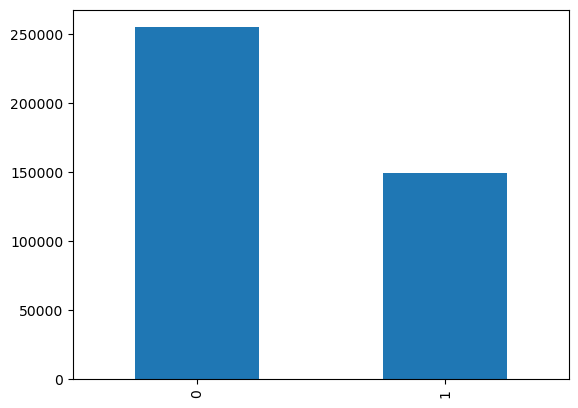

In [11]:
# distribution of duplicate and non-duplicate quesitons

print(df['is_duplicate'].value_counts())
print(round((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100, 2))
df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
# repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("unique questions :",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("repeated questions : ", x[x].shape[0])

unique questions : 537933
repeated questions :  111780


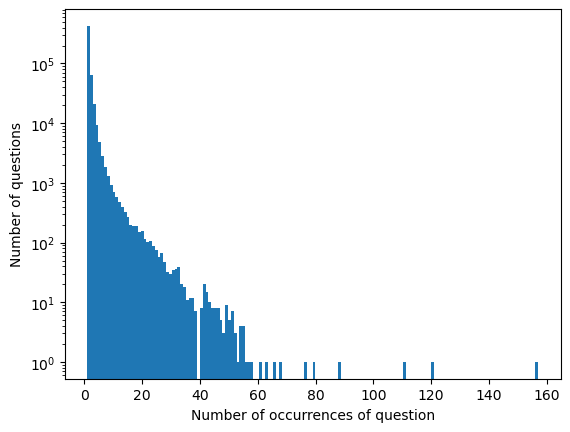

In [13]:
# repeated questions histogram

plt.hist(qid.value_counts().values, bins=160)
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')
plt.yscale('log')
plt.show()

In [14]:
#checking for Nan values
nan_rows = df[df.isnull().any(1)]
print(nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                                                                  question2  \
105780                                                                                                  NaN   
201841                                                                                                  NaN   
363362  My Chinese name is Haichao Yu. What English name is most suitable for me considering the pronoun...   

        is_duplicate  
105780             0  
201841             0  
363362             0  


/tmp/ipykernel_32/2679301262.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_rows = df[df.isnull().any(1)]


In [15]:
df = df.fillna(' ')
nan_rows = df[df.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


/tmp/ipykernel_32/648104289.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_rows = df[df.isnull().any(1)]


Feature Engineering

- freq_qid1 = frequency of qid 1
- freq_qid2
- q1len
- q2len
- q1words
- q2words
- words common : # of common unique words
- words total : total words in q1 + total words in q2 (unique)
- word share : (word common) / (word total)
- freq_q1 + freq_q2
- freq_q1 - freq_q2

In [16]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()
df['q1_n_words'] = df['question1'].apply(lambda x: len(x.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda x: len(x.split(" ")))

def common_words(row):
    l1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    l2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return 1.0 * len(l1&l2)

df['word_common'] = df.apply(common_words, axis=1)

def total_words(row):
    t1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    t2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return 1.0 * (len(t1) + len(t2))

df['word_total'] = df.apply(total_words, axis=1)

df['word_share'] = round(df['word_common']/df['word_total'],2)

df['freq_q1+q2'] = df['freq_qid1'] + df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1'] - df['freq_qid2'])

df.to_csv("basic_feature_engineering_train.csv", index = False)

df.head()


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,1,1,66,57,14,12,10.0,23.0,0.43,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,4,1,51,88,8,13,4.0,20.0,0.20,5,3
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,1,1,73,59,14,10,4.0,24.0,0.17,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,1,1,50,65,11,9,0.0,19.0,0.00,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.10,4,2


In [17]:
df.describe()

,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198,2.827609,3.046961,59.536711,60.108370,10.944594,11.185125,4.511610,21.126112,0.223347,5.874570,1.845715
std,116708.614503,157751.700002,159903.182629,0.482588,4.487418,6.026871,29.940650,33.863862,5.431944,6.311069,3.098656,8.592622,0.128243,9.091068,5.187882
min,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000,1.000000,1.000000,39.000000,39.000000,7.000000,7.000000,2.000000,15.000000,0.120000,2.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000,1.000000,1.000000,52.000000,51.000000,10.000000,10.000000,4.000000,19.000000,0.220000,3.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000,3.000000,2.000000,72.000000,72.000000,13.000000,13.000000,6.000000,25.000000,0.320000,5.000000,2.000000
max,404289.000000,537932.000000,537933.000000,1.000000,50.000000,120.000000,623.000000,1169.000000,125.000000,237.000000,41.000000,166.000000,0.500000,157.000000,119.000000


In [19]:
print("Number of quesitons with minimum length [quesiton 1] : ",df[df['q1_n_words']==1].shape[0])

Number of quesitons with minimum length [quesiton 1] :  66


/tmp/ipykernel_32/1325670420.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['word_share'], label = 'non_duplicate')
/tmp/ipykernel_32/1325670420.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['word_share'], label = 'duplicate')


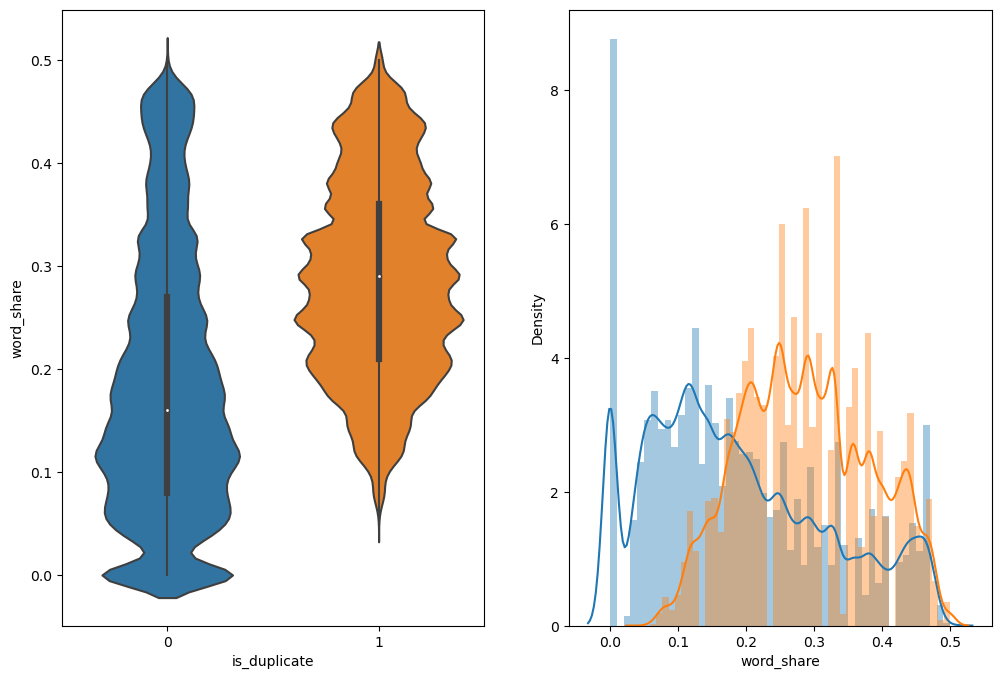

In [20]:
#feature words share

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate', y='word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==0]['word_share'], label = 'non_duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_share'], label = 'duplicate')
plt.show()


Imp feature as the distributions are different

/tmp/ipykernel_32/2429630818.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['word_common'], label = 'non_duplicate')
/tmp/ipykernel_32/2429630818.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['word_common'], label = 'duplicate')


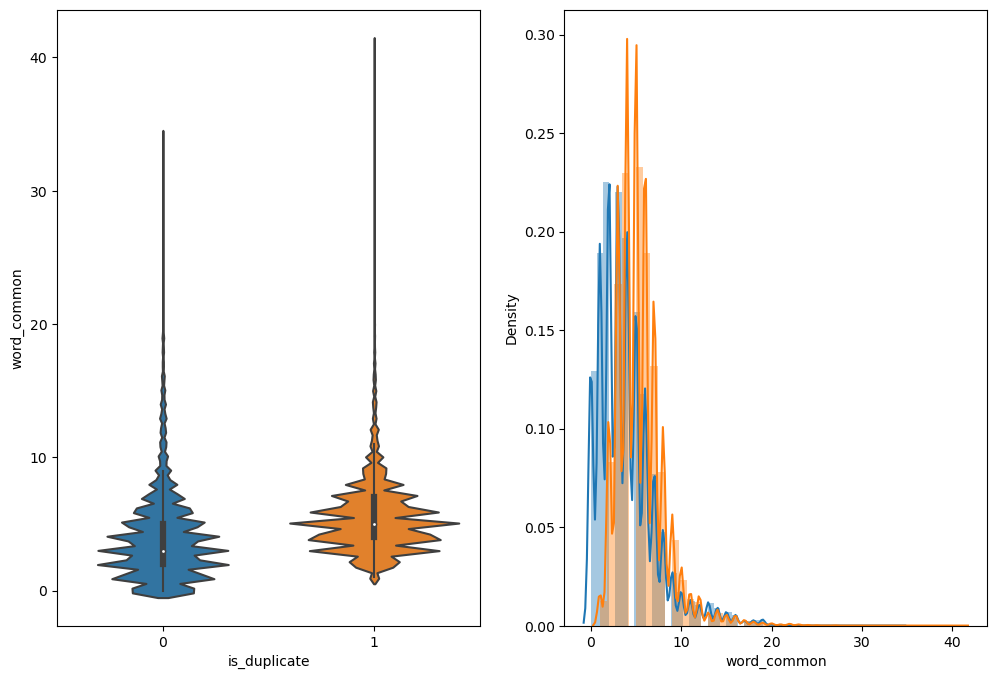

In [21]:
#feature words common

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate', y='word_common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==0]['word_common'], label = 'non_duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_common'], label = 'duplicate')
plt.show()

Not so important feature

***Preprocessing of Text***

- Remove html tags  (quora contains htms tags as well)
- remove punctuation
- preform stemming
- remove stop words
- expanding contractions

In [22]:
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

def preprocess(x):
    x = str(x).lower().strip()
    
    # Replace certial special chars with their string equivalents
    x = x.replace('%', ' percent').replace('$',' dollar').replace(',000,000','m').replace(',000','k').replace("won't", 'will not').replace('cannot', 'can not').replace("n't", ' not').replace("what's", 'what is').replace("'ve",' have').replace("he's", 'he is').replace("she's",'she is').replace("'ll", ' will')
    
    x = re.sub(r'([0-9]+)000000000' , r'\1b', x)
    x = re.sub(r'([0-9]+)000000' , r'\1m', x)
    x = re.sub(r'([0-9]+)000' , r'\1k', x)

    porter = PorterStemmer()
    if type(x) == type(''):
        x = porter.stem(x)
        x = BeautifulSoup(x)
        x = x.get_text()
        
    pattern = re.compile('\W')
    
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ',x).strip()
    
    
    return x
    

In [23]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

***Advance Feature Extraction***

- tokens = set of unique words in a sentence
- stop words = nlp stop words
- word = token which is not a stop word


Token Based
- cwc_min = common_word_count/min(len(q1_words),len(q2_words))
- cwc-max = common_word_count/max(len(q1_words),len(q2_words))
- csc_min = common_stop_count/min(len(q1_stops),len(q2_stops))
- csc-max = common_stop_count/max(len(q1_stops),len(q2_stops))
- ctc_min = common_token_count/min(len(q1_tokens),len(q2_tokens))
- ctc-max = common_token_count/max(len(q1_tokens),len(q2_tokens))
- last_word_eq = int(q1_token[-1] == q2_token[-1])
- first_word_eq = int(q1_token[0] == q2_token[0])

Length Based

- mean_len = (len(q1_tokens) + len(q2_tokens)) / 2
- abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
- longest_substr_ratio : len(longest_common_substr) / min(len(q1_tokens),len(q2_tokens))

***fuzzywuzzy***

gives value b/w 0-100 
0 - dissimilar
100 - similar

- fuzz_ratio : checks the edit distance between 2 strings [minimum no. of add/delete/insert operations required to make strings equals]
    
    issue 1) yankees, newyork yankees = 60 [newyork needs to be added sp low score but both are same teams]
          2) Newyork mets, Newyork Yankees = 75 , edit distance is less so high score but both are different teams
          
- fuzz_partial_ratio : checks if any partial substring matches completely or not [longer the substring higher the value]
    
    issue : newyork vs atlanta , atlanta vs newyork will give low score
    
- token_sort_ratio : take all the tokens, sort them and them compare
    
    issue : s1 = mariners vs angels
            s2 = los angeles angels of anaheim seattle mariners 
            It will not give very high score as s2 is long with extra tokens
         
- token_set_ratio : apply token sort , so s1 = angels mariners vs , s2 = anaheim angeles angels los mariners of seattle
    
    now t0 = [sorted intersection]
        t1 = [sorted_intersection] + [sorted rest of s1]
        t2 = [sorted_intersection] + [sorted rest of s2]
        
    and then compare each pair and take the max fuzz value among all 

    issue : s1 = sirhan, sirhan   s2 = sirhan   : value is 100, so repetitive words have issues




In [24]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,1,1,66,57,14,12,10.0,23.0,0.43,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,4,1,51,88,8,13,4.0,20.0,0.20,5,3
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,1,1,73,59,14,10,4.0,24.0,0.17,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,1,1,50,65,11,9,0.0,19.0,0.00,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.10,4,2


In [25]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)
df.head()

/tmp/ipykernel_32/1614884235.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  x = BeautifulSoup(x)


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,1,1,66,57,14,12,10.0,23.0,0.43,2,0
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,4,1,51,88,8,13,4.0,20.0,0.20,5,3
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,1,1,73,59,14,10,4.0,24.0,0.17,2,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is divided by 24 23,0,1,1,50,65,11,9,0.0,19.0,0.00,2,0
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,3,1,76,39,13,7,2.0,20.0,0.10,4,2


In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    
    STOP_WORDS = stopwords.words('english')
    
    token_features = [0.0]*8
    
    # extracting tokens
    q1_tokens = q1.split(" ")
    q2_tokens = q2.split(" ")
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    #extracting stop words
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    #extracting words
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    common_word_count = len(q1_words.intersection(q2_words))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    token_features[0] = common_word_count/(min(len(q1_words) , len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count/(max(len(q1_words) , len(q2_words)) + SAFE_DIV)
    
    token_features[2] = common_stop_count/(min(len(q1_stops) , len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count/(max(len(q1_stops) , len(q2_stops)) + SAFE_DIV)
    
    token_features[4] = common_token_count/(min(len(q1_tokens) , len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count/(max(len(q1_tokens) , len(q2_tokens)) + SAFE_DIV)
    
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [29]:
token_features = df.apply(fetch_token_features , axis=1)

df['cwc_min'] = list(map(lambda x : x[0], token_features))
df['cwc_max'] = list(map(lambda x : x[1], token_features))
df['csc_min'] = list(map(lambda x : x[2], token_features))
df['csc_max'] = list(map(lambda x : x[3], token_features))
df['ctc_min'] = list(map(lambda x : x[4], token_features))
df['ctc_max'] = list(map(lambda x : x[5], token_features))
df['last_word_eq'] = list(map(lambda x : x[6], token_features))
df['first_word_eq'] = list(map(lambda x : x[7], token_features))

In [30]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,...,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,1,1,66,57,...,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0,1
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,4,1,51,88,...,5,3,0.833319,0.454541,0.749981,0.599988,0.666661,0.470585,0,1
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,1,1,73,59,...,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0,1
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is divided by 24 23,0,1,1,50,65,...,2,0,0.249994,0.142855,0.000000,0.000000,0.083333,0.055555,0,0
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,3,1,76,39,...,4,2,0.399992,0.181817,0.999950,0.666644,0.571420,0.266665,0,1


In [32]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=276341dee32816d090d06763dd1996ff8f919582d2f237aa3b71e90286551cbf
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [33]:
import distance
def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # extracting tokens
    q1_tokens = q1.split(" ")
    q2_tokens = q2.split(" ")
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1,q2))
    if len(strs)>0:
        length_features[2] = len(strs[0]) / min(len(q1_tokens), len(q2_tokens))
    else:
        length_features[2] = 0.0
    
    return length_features

In [34]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [35]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,1,1,66,57,...,0.833319,0.999983,0.999983,0.916659,0.785709,0,1,2,13.0,4.666667
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,4,1,51,88,...,0.454541,0.749981,0.599988,0.666661,0.470585,0,1,5,14.5,2.500000
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,1,1,73,59,...,0.333328,0.399992,0.249997,0.399996,0.285712,0,1,4,12.0,1.000000
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is divided by 24 23,0,1,1,50,65,...,0.142855,0.000000,0.000000,0.083333,0.055555,0,0,6,15.0,0.166667
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,3,1,76,39,...,0.181817,0.999950,0.666644,0.571420,0.266665,0,1,8,11.0,0.857143


In [37]:
!pip install fuzzywuzzy

In [38]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    fuzzy_features[0] = fuzz.QRatio(q1, q2)
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)
    
    return fuzzy_features

In [39]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [40]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,1,1,66,57,...,0.785709,0,1,2,13.0,4.666667,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,4,1,51,88,...,0.470585,0,1,5,14.5,2.500000,66,74,63,86
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,1,1,73,59,...,0.285712,0,1,4,12.0,1.000000,54,53,66,66
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is divided by 24 23,0,1,1,50,65,...,0.055555,0,0,6,15.0,0.166667,35,39,36,36
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,3,1,76,39,...,0.266665,0,1,8,11.0,0.857143,46,55,47,67


***Checking Commit***

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    404290 non-null  int64  
 1   qid1                  404290 non-null  int64  
 2   qid2                  404290 non-null  int64  
 3   question1             404290 non-null  object 
 4   question2             404290 non-null  object 
 5   is_duplicate          404290 non-null  int64  
 6   freq_qid1             404290 non-null  int64  
 7   freq_qid2             404290 non-null  int64  
 8   q1_len                404290 non-null  int64  
 9   q2_len                404290 non-null  int64  
 10  q1_n_words            404290 non-null  int64  
 11  q2_n_words            404290 non-null  int64  
 12  word_common           404290 non-null  float64
 13  word_total            404290 non-null  float64
 14  word_share            404290 non-null  float64
 15  

***Analysis on advanced features***

In [43]:
df = pd.read_csv('../input/quora-processed-data/processed_data_wo_index.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,1,1,66,57,...,0.785709,0,1,2,13.0,4.666667,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,4,1,51,88,...,0.470585,0,1,5,14.5,2.500000,66,74,63,86
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,1,1,73,59,...,0.285712,0,1,4,12.0,1.000000,54,53,66,66
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is divided by 24 23,0,1,1,50,65,...,0.055555,0,0,6,15.0,0.166667,35,39,36,36
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,3,1,76,39,...,0.266665,0,1,8,11.0,0.857143,46,55,47,67


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


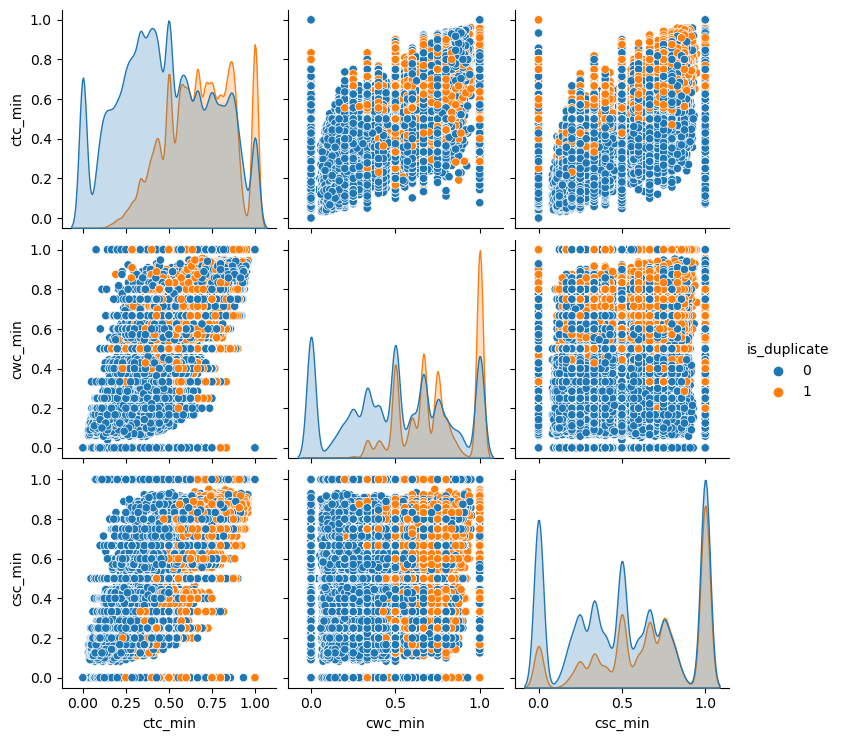

In [44]:
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']], hue = 'is_duplicate')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


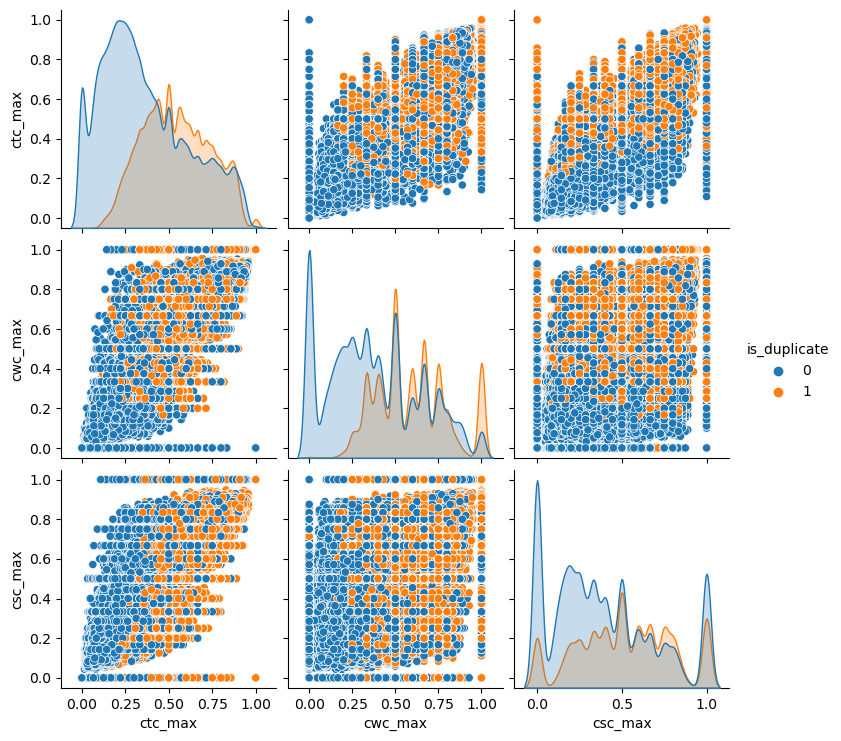

In [45]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']], hue = 'is_duplicate')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


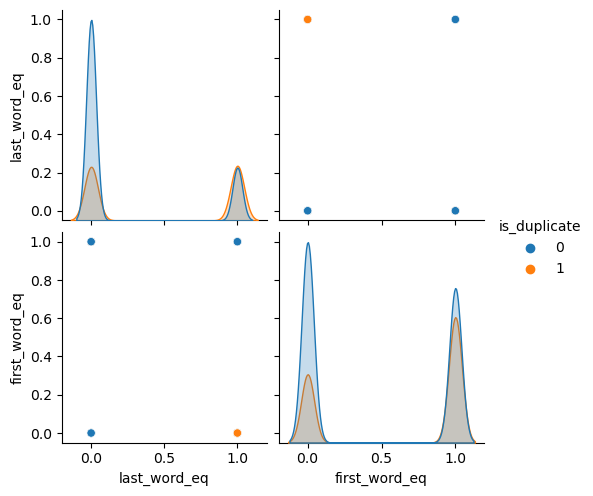

In [46]:
sns.pairplot(df[['last_word_eq', 'first_word_eq', 'is_duplicate']], hue = 'is_duplicate')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


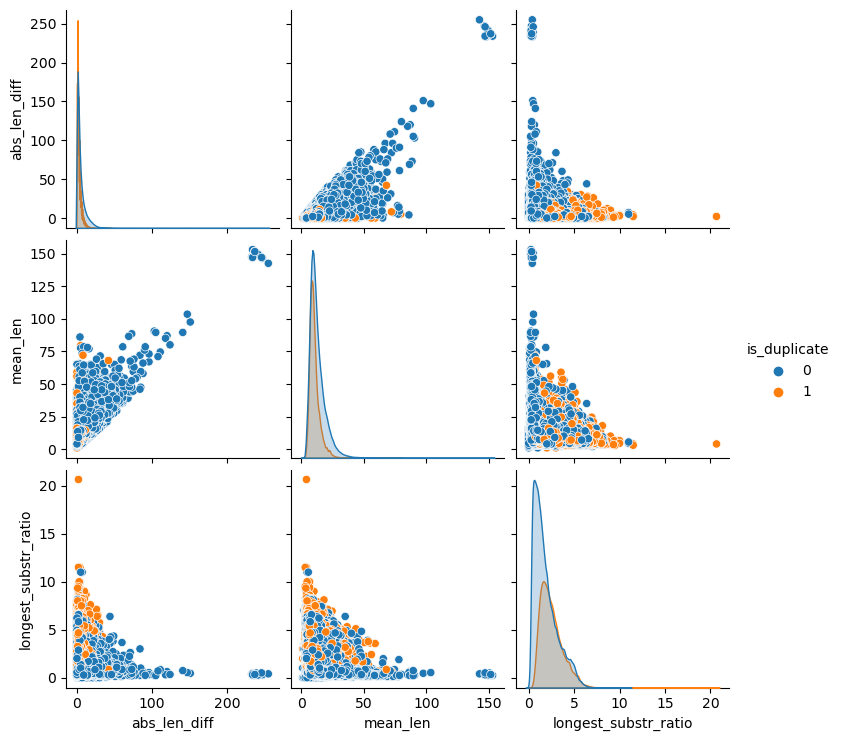

In [47]:
sns.pairplot(df[['abs_len_diff', 'mean_len', 'longest_substr_ratio', 'is_duplicate']], hue = 'is_duplicate')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


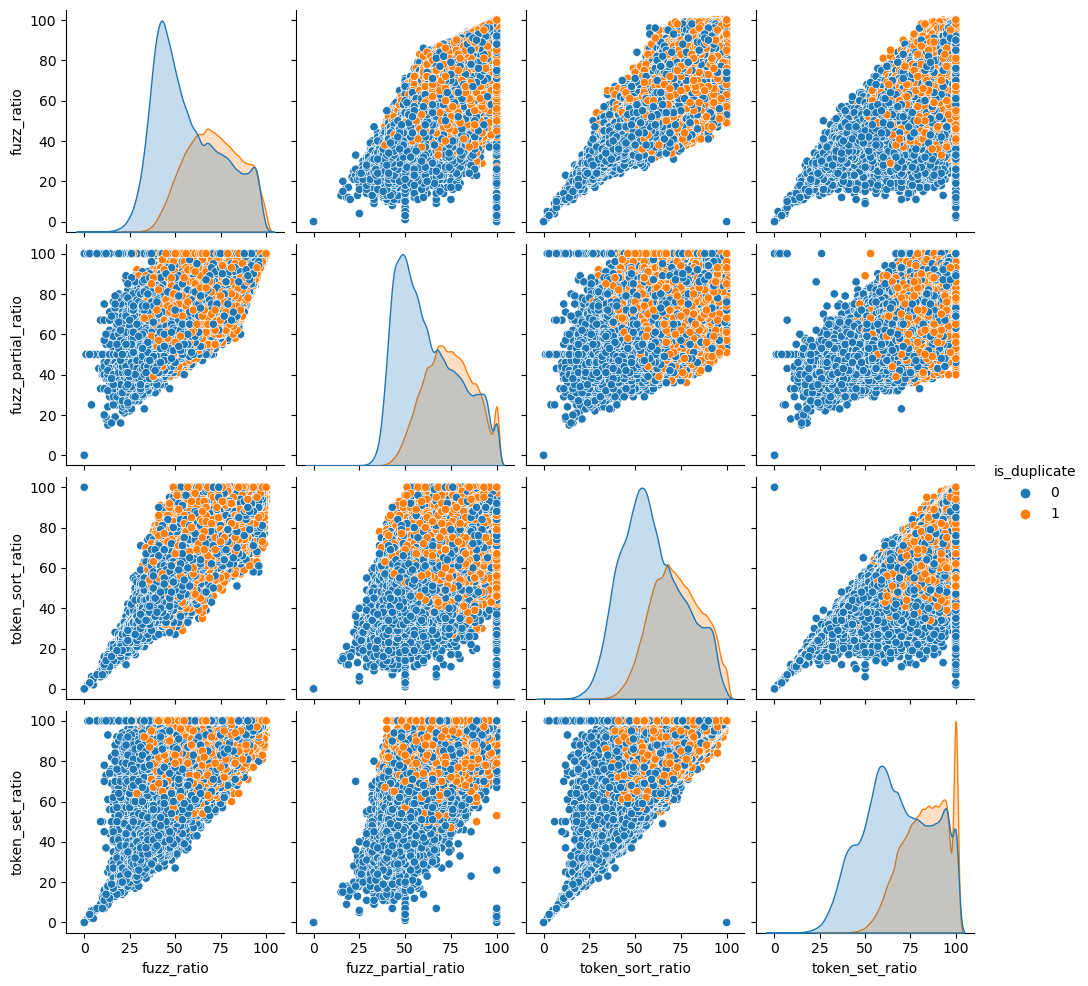

In [48]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio', 'is_duplicate']], hue = 'is_duplicate')

*** idf weighted word2vec using GLOVE***

In [ ]:
df = pd.read_csv('../input/quora-processed-data/processed_data_wo_index.csv')

In [50]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,1,1,66,57,...,0.785709,0,1,2,13.0,4.666667,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,4,1,51,88,...,0.470585,0,1,5,14.5,2.500000,66,74,63,86
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,1,1,73,59,...,0.285712,0,1,4,12.0,1.000000,54,53,66,66
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is divided by 24 23,0,1,1,50,65,...,0.055555,0,0,6,15.0,0.166667,35,39,36,36
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,3,1,76,39,...,0.266665,0,1,8,11.0,0.857143,46,55,47,67


In [51]:
!pip install tqdm

In [52]:
df['question1'] = df['question1'].apply(lambda x : str(x))
df['question2'] = df['question2'].apply(lambda x : str(x))

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

#merge texts

questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False,)
tfidf.fit_transform(questions)

#dict key -> word and value -> idf value
word2tfidf = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

In [54]:
# pip update spacy

In [55]:
import spacy

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

***from here use tdf to point to say sample data***

In [57]:
tdf = df.sample(100000)
tdf.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
197563,197563,298558,298559,how do i stop my dog from jumping up on the counter in the kitchen,why does my dog jump on me when i come home what can i do to make him stop,0,1,1,67,76,...,0.299999,0,0,5,17.5,0.533333,50,52,64,63
279153,279153,398537,298938,how do i learn sanskrit language,where can i learn sanskrit,1,1,1,33,27,...,0.499992,0,0,1,5.5,3.400000,66,73,59,76
185240,185240,282838,235887,is their an antidote for overdose of sleeping pills,what can you do for overdosing on sleeping pills,0,1,1,52,49,...,0.333330,1,0,0,9.0,1.666667,73,76,73,73
278362,278362,397628,397629,what is a good haskell tutorial that offers learning by small task programming,should i learn racket or haskell,0,1,1,79,33,...,0.076922,0,0,7,9.5,1.333333,35,44,47,47
169876,169876,262776,262777,would learning about every murder that as ever happen really make you a good dectective,would learning about every murder that as ever happen really make you a good dectective,1,1,1,88,89,...,0.999993,1,1,0,15.0,5.800000,100,100,100,100


In [58]:
import spacy
from tqdm import tqdm

nlp = spacy.load('en_core_web_sm')

vecs1 = []

#tqdm is used to display progress
for qu1 in tqdm(list(tdf['question1'])):
    doc1 = nlp(qu1)
    mean_vec1 = np.zeros([len(doc1) , 96])
    for word1 in doc1:
        vec1 = word1.vector
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        mean_vec1 += vec1*idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)

tdf['q1_feats_m'] = vecs1

100%|██████████| 100000/100000 [13:30<00:00, 123.45it/s]


In [60]:
vecs2 = []

#tqdm is used to display progress
for qu2 in tqdm(list(tdf['question2'])):
    doc2 = nlp(qu2)
    mean_vec2 = np.zeros([len(doc2) , 96])
    for word2 in doc2:
        vec2 = word2.vector
        try:
            idf = word2tfidf[str(word2)]
        except:
            idf = 0
        mean_vec2 += vec2*idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)

tdf['q2_feats_m'] = vecs2

100%|██████████| 100000/100000 [13:41<00:00, 121.69it/s]


In [62]:
tdf.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,...,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,q1_feats_m,q2_feats_m
197563,197563,298558,298559,how do i stop my dog from jumping up on the counter in the kitchen,why does my dog jump on me when i come home what can i do to make him stop,0,1,1,67,76,...,0,5,17.5,0.533333,50,52,64,63,"[-4.333241164684296, -6.311025853268802, 9.282552257180214, -19.912354201078415, -5.374039776623...","[-22.575100660324097, -32.61800879240036, 6.173906583338976, 12.423699848353863, -30.66370624303..."
279153,279153,398537,298938,how do i learn sanskrit language,where can i learn sanskrit,1,1,1,33,27,...,0,1,5.5,3.400000,66,73,59,76,"[-8.915233731269836, -24.818924069404602, -0.8388925828039646, 11.955472707748413, -17.090594291...","[-3.8506345748901367, -21.976362705230713, 0.8233277797698975, 7.319370448589325, -5.39524865150..."
185240,185240,282838,235887,is their an antidote for overdose of sleeping pills,what can you do for overdosing on sleeping pills,0,1,1,52,49,...,0,0,9.0,1.666667,73,76,73,73,"[-7.458110809326172, 26.216706454753876, 0.7201245576143265, 2.9658419489860535, 28.989379644393...","[-2.832219421863556, 28.630694299936295, 8.00598394870758, 11.48437711596489, 4.1346728056669235..."
278362,278362,397628,397629,what is a good haskell tutorial that offers learning by small task programming,should i learn racket or haskell,0,1,1,79,33,...,0,7,9.5,1.333333,35,44,47,47,"[24.48787973821163, -14.021722614765167, 11.593948543071747, 27.269349485635757, 8.8211266994476...","[-8.914577782154083, -22.308119773864746, -10.146655395627022, -0.3506107032299042, -18.51827895..."
169876,169876,262776,262777,would learning about every murder that as ever happen really make you a good dectective,would learning about every murder that as ever happen really make you a good dectective,1,1,1,88,89,...,1,0,15.0,5.800000,100,100,100,100,"[-9.394053131341934, -25.668063655495644, -13.779057800769806, 1.8093428313732147, -8.5341150760...","[-9.394053131341934, -25.668063655495644, -13.779057800769806, 1.8093428313732147, -8.5341150760..."


In [63]:
# tdf.to_csv('/kaggle/working/word2vec.csv' , index = False)

In [64]:
df_q1 = pd.DataFrame(tdf.q1_feats_m.values.tolist(), index = tdf.index)
df_q1.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
197563,-4.333241,-6.311026,9.282552,-19.912354,-5.374040,-23.131773,20.866202,0.723397,21.692774,-7.291515,...,26.252833,-3.282443,-42.809239,14.340370,-26.563604,-15.447571,20.598922,45.643314,-2.030678,11.256389
279153,-8.915234,-24.818924,-0.838893,11.955473,-17.090594,-4.004560,16.185228,15.382635,-3.953282,2.246910,...,-2.891492,-17.470928,-18.559332,15.360691,-1.744868,-5.020587,20.263312,18.066854,-7.632813,11.276591
185240,-7.458111,26.216706,0.720125,2.965842,28.989380,6.687139,30.587624,4.397299,-8.713975,-3.549985,...,2.166089,-5.152170,-14.603614,-9.676550,-25.044073,2.946407,52.144792,34.007985,-22.527321,4.737017
278362,24.487880,-14.021723,11.593949,27.269349,8.821127,-8.139092,27.777948,9.799691,14.575382,-13.826707,...,-9.490128,11.902301,-35.549321,49.627291,-14.681732,23.300206,40.457412,53.405126,-39.020149,14.034737
169876,-9.394053,-25.668064,-13.779058,1.809343,-8.534115,-30.750456,2.407988,0.103282,-8.041881,-12.651313,...,16.566720,-2.323886,-2.831283,25.786106,22.699852,7.065433,30.109986,54.707403,-21.376978,-3.053694


In [65]:
new_col_names = {col : str(col) + '_q1' for col in df_q1.columns}
df_q1.rename(columns = new_col_names, inplace=True)
df_q1.head()

,0_q1,1_q1,2_q1,3_q1,4_q1,5_q1,6_q1,7_q1,8_q1,9_q1,...,86_q1,87_q1,88_q1,89_q1,90_q1,91_q1,92_q1,93_q1,94_q1,95_q1
197563,-4.333241,-6.311026,9.282552,-19.912354,-5.374040,-23.131773,20.866202,0.723397,21.692774,-7.291515,...,26.252833,-3.282443,-42.809239,14.340370,-26.563604,-15.447571,20.598922,45.643314,-2.030678,11.256389
279153,-8.915234,-24.818924,-0.838893,11.955473,-17.090594,-4.004560,16.185228,15.382635,-3.953282,2.246910,...,-2.891492,-17.470928,-18.559332,15.360691,-1.744868,-5.020587,20.263312,18.066854,-7.632813,11.276591
185240,-7.458111,26.216706,0.720125,2.965842,28.989380,6.687139,30.587624,4.397299,-8.713975,-3.549985,...,2.166089,-5.152170,-14.603614,-9.676550,-25.044073,2.946407,52.144792,34.007985,-22.527321,4.737017
278362,24.487880,-14.021723,11.593949,27.269349,8.821127,-8.139092,27.777948,9.799691,14.575382,-13.826707,...,-9.490128,11.902301,-35.549321,49.627291,-14.681732,23.300206,40.457412,53.405126,-39.020149,14.034737
169876,-9.394053,-25.668064,-13.779058,1.809343,-8.534115,-30.750456,2.407988,0.103282,-8.041881,-12.651313,...,16.566720,-2.323886,-2.831283,25.786106,22.699852,7.065433,30.109986,54.707403,-21.376978,-3.053694


In [66]:
df_q2 = pd.DataFrame(tdf.q2_feats_m.values.tolist(), index = tdf.index)
df_q2.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
197563,-22.575101,-32.618009,6.173907,12.423700,-30.663706,-33.766829,43.530368,7.599658,-7.948385,-13.248938,...,4.634321,-28.407848,-44.955578,32.426448,8.552732,-31.515574,20.180176,40.941638,9.540535,27.388617
279153,-3.850635,-21.976363,0.823328,7.319370,-5.395249,-3.774668,22.613167,9.724577,-4.788855,-2.223871,...,-14.202608,-10.898679,-5.333530,12.515454,-3.354750,-8.750688,15.992433,8.557624,-2.673460,20.238416
185240,-2.832219,28.630694,8.005984,11.484377,4.134673,-2.330813,13.692825,-4.474643,10.088207,6.706204,...,2.878156,-4.190879,-24.401116,-12.960727,-20.441125,22.467615,5.517528,40.734936,-20.957788,-19.186772
278362,-8.914578,-22.308120,-10.146655,-0.350611,-18.518279,12.693905,23.446129,22.341722,-1.750317,0.974540,...,-4.770098,-1.332844,-11.817632,41.166998,-6.520956,-5.648506,16.338980,31.981194,8.278973,10.290762
169876,-9.394053,-25.668064,-13.779058,1.809343,-8.534115,-30.750456,2.407988,0.103282,-8.041881,-12.651313,...,16.566720,-2.323886,-2.831283,25.786106,22.699852,7.065433,30.109986,54.707403,-21.376978,-3.053694


In [67]:
new_col_names = {col : str(col) + '_q2' for col in df_q2.columns}
df_q2.rename(columns = new_col_names, inplace=True)
df_q2.head()

,0_q2,1_q2,2_q2,3_q2,4_q2,5_q2,6_q2,7_q2,8_q2,9_q2,...,86_q2,87_q2,88_q2,89_q2,90_q2,91_q2,92_q2,93_q2,94_q2,95_q2
197563,-22.575101,-32.618009,6.173907,12.423700,-30.663706,-33.766829,43.530368,7.599658,-7.948385,-13.248938,...,4.634321,-28.407848,-44.955578,32.426448,8.552732,-31.515574,20.180176,40.941638,9.540535,27.388617
279153,-3.850635,-21.976363,0.823328,7.319370,-5.395249,-3.774668,22.613167,9.724577,-4.788855,-2.223871,...,-14.202608,-10.898679,-5.333530,12.515454,-3.354750,-8.750688,15.992433,8.557624,-2.673460,20.238416
185240,-2.832219,28.630694,8.005984,11.484377,4.134673,-2.330813,13.692825,-4.474643,10.088207,6.706204,...,2.878156,-4.190879,-24.401116,-12.960727,-20.441125,22.467615,5.517528,40.734936,-20.957788,-19.186772
278362,-8.914578,-22.308120,-10.146655,-0.350611,-18.518279,12.693905,23.446129,22.341722,-1.750317,0.974540,...,-4.770098,-1.332844,-11.817632,41.166998,-6.520956,-5.648506,16.338980,31.981194,8.278973,10.290762
169876,-9.394053,-25.668064,-13.779058,1.809343,-8.534115,-30.750456,2.407988,0.103282,-8.041881,-12.651313,...,16.566720,-2.323886,-2.831283,25.786106,22.699852,7.065433,30.109986,54.707403,-21.376978,-3.053694


***Total number of features***

- 11 basic features
- 15 advanced features
- 96 featurs for q1
- 96 features for q2
- total : 218

In [68]:
df_basic_adv = tdf.drop(['id','qid1','qid2','question1','question2','is_duplicate', 'q1_feats_m','q2_feats_m'], axis=1)
df_basic_adv.head()

,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
197563,1,1,67,76,15,19,5.0,32.0,0.16,2,...,0.299999,0,0,5,17.5,0.533333,50,52,64,63
279153,1,1,33,27,6,5,2.0,11.0,0.18,2,...,0.499992,0,0,1,5.5,3.400000,66,73,59,76
185240,1,1,52,49,9,9,3.0,18.0,0.17,2,...,0.333330,1,0,0,9.0,1.666667,73,76,73,73
278362,1,1,79,33,13,6,0.0,19.0,0.00,2,...,0.076922,0,0,7,9.5,1.333333,35,44,47,47
169876,1,1,88,89,15,15,14.0,30.0,0.47,2,...,0.999993,1,1,0,15.0,5.800000,100,100,100,100


In [69]:
f_df = pd.concat([df_q1 , df_q2], axis=1)
f_df.head()

,0_q1,1_q1,2_q1,3_q1,4_q1,5_q1,6_q1,7_q1,8_q1,9_q1,...,86_q2,87_q2,88_q2,89_q2,90_q2,91_q2,92_q2,93_q2,94_q2,95_q2
197563,-4.333241,-6.311026,9.282552,-19.912354,-5.374040,-23.131773,20.866202,0.723397,21.692774,-7.291515,...,4.634321,-28.407848,-44.955578,32.426448,8.552732,-31.515574,20.180176,40.941638,9.540535,27.388617
279153,-8.915234,-24.818924,-0.838893,11.955473,-17.090594,-4.004560,16.185228,15.382635,-3.953282,2.246910,...,-14.202608,-10.898679,-5.333530,12.515454,-3.354750,-8.750688,15.992433,8.557624,-2.673460,20.238416
185240,-7.458111,26.216706,0.720125,2.965842,28.989380,6.687139,30.587624,4.397299,-8.713975,-3.549985,...,2.878156,-4.190879,-24.401116,-12.960727,-20.441125,22.467615,5.517528,40.734936,-20.957788,-19.186772
278362,24.487880,-14.021723,11.593949,27.269349,8.821127,-8.139092,27.777948,9.799691,14.575382,-13.826707,...,-4.770098,-1.332844,-11.817632,41.166998,-6.520956,-5.648506,16.338980,31.981194,8.278973,10.290762
169876,-9.394053,-25.668064,-13.779058,1.809343,-8.534115,-30.750456,2.407988,0.103282,-8.041881,-12.651313,...,16.566720,-2.323886,-2.831283,25.786106,22.699852,7.065433,30.109986,54.707403,-21.376978,-3.053694


In [70]:
f_df = pd.concat([df_basic_adv, f_df], axis=1)
f_df.head()

,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,...,86_q2,87_q2,88_q2,89_q2,90_q2,91_q2,92_q2,93_q2,94_q2,95_q2
197563,1,1,67,76,15,19,5.0,32.0,0.16,2,...,4.634321,-28.407848,-44.955578,32.426448,8.552732,-31.515574,20.180176,40.941638,9.540535,27.388617
279153,1,1,33,27,6,5,2.0,11.0,0.18,2,...,-14.202608,-10.898679,-5.333530,12.515454,-3.354750,-8.750688,15.992433,8.557624,-2.673460,20.238416
185240,1,1,52,49,9,9,3.0,18.0,0.17,2,...,2.878156,-4.190879,-24.401116,-12.960727,-20.441125,22.467615,5.517528,40.734936,-20.957788,-19.186772
278362,1,1,79,33,13,6,0.0,19.0,0.00,2,...,-4.770098,-1.332844,-11.817632,41.166998,-6.520956,-5.648506,16.338980,31.981194,8.278973,10.290762
169876,1,1,88,89,15,15,14.0,30.0,0.47,2,...,16.566720,-2.323886,-2.831283,25.786106,22.699852,7.065433,30.109986,54.707403,-21.376978,-3.053694


In [62]:
checkpoint_dataset = pd.concat([f_df, pd.DataFrame(tdf['is_duplicate'])], axis=1)
checkpoint_dataset.head()

,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,...,87_q2,88_q2,89_q2,90_q2,91_q2,92_q2,93_q2,94_q2,95_q2,is_duplicate
136783,1,1,41,35,9,7,4.0,16.0,0.25,2,...,-3.623321,18.818887,9.430884,-4.411877,-11.550412,4.044167,12.547680,-7.907710,22.929444,0
185727,10,9,34,32,7,7,6.0,14.0,0.43,19,...,-3.621783,-6.436736,19.534915,-4.806491,-1.504801,11.609945,17.074502,4.765608,0.348070,1
107671,2,1,52,34,10,7,4.0,17.0,0.24,3,...,-5.575588,-10.557967,14.093538,-9.720590,19.942539,23.584698,17.735236,-7.668470,22.645247,1
173354,1,1,59,71,15,13,6.0,27.0,0.22,2,...,-7.581336,-44.096845,25.919152,2.037391,4.324702,36.235949,28.073345,0.560764,9.425971,0
280156,1,1,49,52,8,8,6.0,16.0,0.38,2,...,13.097384,-25.308397,-9.300212,-17.167736,-0.113385,23.745638,44.606555,-3.741313,4.162663,1


In [62]:
checkpoint_dataset.to_csv('/kaggle/working/quora_idf_wieghted_word2vec_sample.csv')

In [71]:
y_true = tdf['is_duplicate']
y_true.head()

197563    0
279153    1
185240    0
278362    0
169876    1
Name: is_duplicate, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f_df, y_true, random_state=42, stratify=y_true, test_size=0.3)

In [73]:
print("Number of training points :", X_train.shape)
print("Number of testing  points :", X_test.shape)

Number of training points : (70000, 218)
Number of testing  points : (30000, 218)


In [74]:
from collections import Counter
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ", round(int(train_distr[0])/train_len,3), "Class 1: ", round(int(train_distr[1])/train_len, 3))

print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ", round(int(test_distr[0])/test_len,3), "Class 1: ", round(int(test_distr[1])/test_len,3))

---------- Distribution of output variable in train data ----------
Class 0:  0.631 Class 1:  0.369
---------- Distribution of output variable in test data ----------
Class 0:  0.631 Class 1:  0.369


***Building a random model***

In [75]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [76]:
predicted_y = np.zeros((test_len, 2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
    
print("Log Loss on Test Data using Random model :",log_loss(y_test, predicted_y))

Log Loss on Test Data using Random model : 0.8885278599682173


***Logistic Regression with hyperparameter tuning***

In [77]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [78]:
alpha = [10 ** x for x in range(-5,2)]

log_error_array = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log_loss', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels = clf.classes_))
    print('For value of alpha = ',i ,"the log loss is: ", log_loss(y_test, predict_y, labels = clf.classes_))
    
best_alpha = np.argmin(log_error_array)


For value of alpha =  1e-05 the log loss is:  0.4363544185893632
For value of alpha =  0.0001 the log loss is:  0.4398812881769813
For value of alpha =  0.001 the log loss is:  0.44572553983525387
For value of alpha =  0.01 the log loss is:  0.41901405731045077
For value of alpha =  0.1 the log loss is:  0.43893088947744086
For value of alpha =  1 the log loss is:  0.4707041694753602
For value of alpha =  10 the log loss is:  0.5201534146734166


In [80]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log_loss', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print("For alpha value: ",alpha[best_alpha], "Train Log Loss: ", log_loss(y_train, predict_y, labels = clf.classes_))
predict_y = sig_clf.predict_proba(X_test)
print("For alpha value: ",alpha[best_alpha], "Test Log Loss: ", log_loss(y_test, predict_y, labels = clf.classes_))

For alpha value:  0.01 Train Log Loss:  0.4187749338763335
For alpha value:  0.01 Test Log Loss:  0.41901405731045077


***Lnear SVM***

In [83]:
alpha = [10 ** x for x in range(-5,2)]

log_error_array = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels = clf.classes_))
    print('For value of alpha = ',i ,"the log loss is: ", log_loss(y_test, predict_y, labels = clf.classes_))
    
best_alpha = np.argmin(log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print("For alpha value: ",alpha[best_alpha], "Train Log Loss: ", log_loss(y_train, predict_y, labels = clf.classes_))
predict_y = sig_clf.predict_proba(X_test)
print("For alpha value: ",alpha[best_alpha], "Test Log Loss: ", log_loss(y_test, predict_y, labels = clf.classes_))

For value of alpha =  1e-05 the log loss is:  0.43735582269445156


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


For value of alpha =  0.0001 the log loss is:  0.45836109914279255


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic

For value of alpha =  0.001 the log loss is:  0.5064507194863694


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic

For value of alpha =  0.01 the log loss is:  0.4934115716034215


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic

For value of alpha =  0.1 the log loss is:  0.5354943997473609


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


For value of alpha =  1 the log loss is:  0.6130596943618312


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


For value of alpha =  10 the log loss is:  0.6220189441133424
For alpha value:  1e-05 Train Log Loss:  0.43823361428093915
For alpha value:  1e-05 Test Log Loss:  0.43735582269445156


***XG Boost***

In [85]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4


#DMatrix = DMatrix objects are specific data structures used by XGBoost to efficiently store and handle data 
#          during training and prediction
d_train = xgb.DMatrix(X_train, label = y_train)
d_test = xgb.DMatrix(X_test, label = y_test)

#to check for early stopping, it pevents overfitting
watchlist = [(d_train, 'train'), (d_test, 'valid')]

#verbose_eval = print after every 20 iters
#early_stopping_rounds = if perf not improved after 20 iters, then stop
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=20)

xgdmat = xgb.DMatrix(X_train,y_train)

predict_y = bst.predict(d_test)

print("The test log loss is: ", log_loss(y_test, predict_y, labels=clf.classes_))

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-logloss:0.68488	valid-logloss:0.68491
[20]	train-logloss:0.56544	valid-logloss:0.56586
[40]	train-logloss:0.49802	valid-logloss:0.49864
[60]	train-logloss:0.45638	valid-logloss:0.45703
[80]	train-logloss:0.43018	valid-logloss:0.43105
[100]	train-logloss:0.41231	valid-logloss:0.41337
[120]	train-logloss:0.39993	valid-logloss:0.40109
[140]	train-logloss:0.39089	valid-logloss:0.39220
[160]	train-logloss:0.38430	valid-logloss:0.38603
[180]	train-logloss:0.37909	valid-logloss:0.38111
[200]	train-logloss:0.37487	valid-logloss:0.37722
[220]	train-logloss:0.37096	valid-logloss:0.37376
[240]	train-logloss:0.36780	valid-logloss:0.37103
[260]	train-logloss:0.36468	valid-logloss:0.36831
[280]	train-logloss:0.36187	valid-logloss:0.36594
[300]	train-logloss:0.35949	valid-logloss:0.36404
[320]	train-logloss:0.35709	valid-logloss:0.36217
[340]	train-logloss:0.35487	valid-logloss:0.36057
[360]	train-logloss:0.35286	valid-logloss:0.35913
[380]	train-logloss:0.35087	valid-logloss:0.35779
[399]	